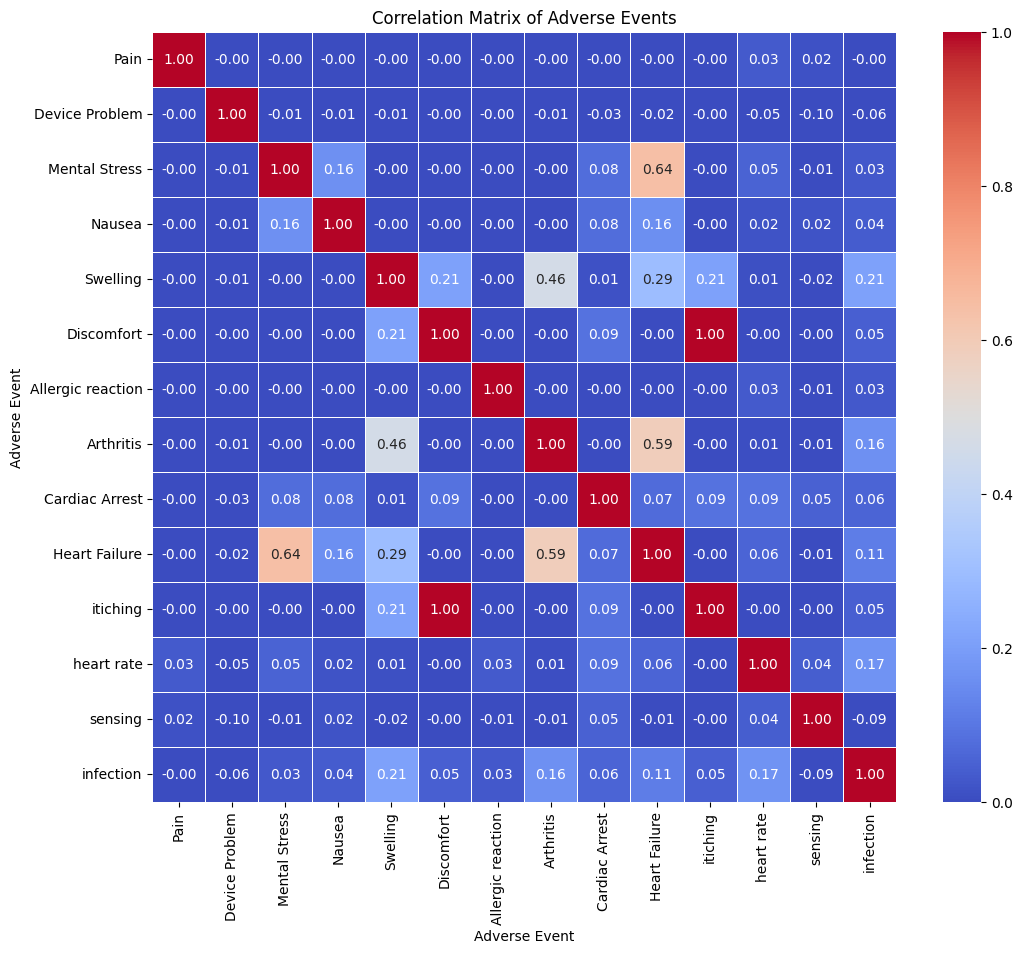

In [34]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('/content/finaldata.csv')

# Load the adverse events keywords file
keywords_data = pd.read_csv('/content/adverse_events_keywords.csv')


# Extract the FOI_TEXT column from your dataset and drop missing values
foi_text = data['FOI_TEXT'].dropna().values

# Function to clean and extract words from text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetical characters
    return text

# Apply the function to clean the keywords in the adverse events keywords file
keywords_data['Keywords'] = keywords_data['Keywords'].apply(lambda x: [kw.strip().lower() for kw in x.split(',')])

# Create a new dataframe to track occurrences of these keywords from the provided adverse events list
adverse_event_keywords = pd.DataFrame(0, index=data.index, columns=keywords_data['Adverse Event'])

# Populate the dataframe based on the presence of each keyword in the FOI_TEXT
for i, text in enumerate(foi_text):
    words = clean_text(text).split()
    for index, row in keywords_data.iterrows():
        adverse_event = row['Adverse Event']
        event_keywords = row['Keywords']
        # If any of the event keywords are found in the text, mark the occurrence
        if any(kw in words for kw in event_keywords):
            adverse_event_keywords.at[i, adverse_event] = 1

# Now that we have the binary matrix of adverse event occurrences, let's remove columns with all zeros (no occurrence)
adverse_event_keywords_filtered = adverse_event_keywords.loc[:, (adverse_event_keywords != 0).any(axis=0)]

# Compute the correlation matrix only for the filtered events
correlation_matrix_adverse_events = adverse_event_keywords_filtered.corr()

# Set a threshold for strong correlations, using -0.1 for negative and positive correlations
threshold = -0.1

# Mask for correlations that meet or exceed the threshold
strong_corr_matrix = correlation_matrix_adverse_events[(correlation_matrix_adverse_events >= threshold) |
                                                       (correlation_matrix_adverse_events <= threshold)]

# Remove columns and rows that are completely NaN (no strong correlations)
strong_corr_matrix = strong_corr_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Define custom ticks for the color bar like in your friend's example
colorbar_ticks = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0]

# Plot the filtered correlation matrix using a color map similar to your friend's
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt=".2f", linewidths=0.5, cbar_kws={'ticks': colorbar_ticks})

# Set the custom tick labels for the color bar
heatmap.collections[0].colorbar.set_ticks(colorbar_ticks)

plt.title("Correlation Matrix of Adverse Events")
plt.show()



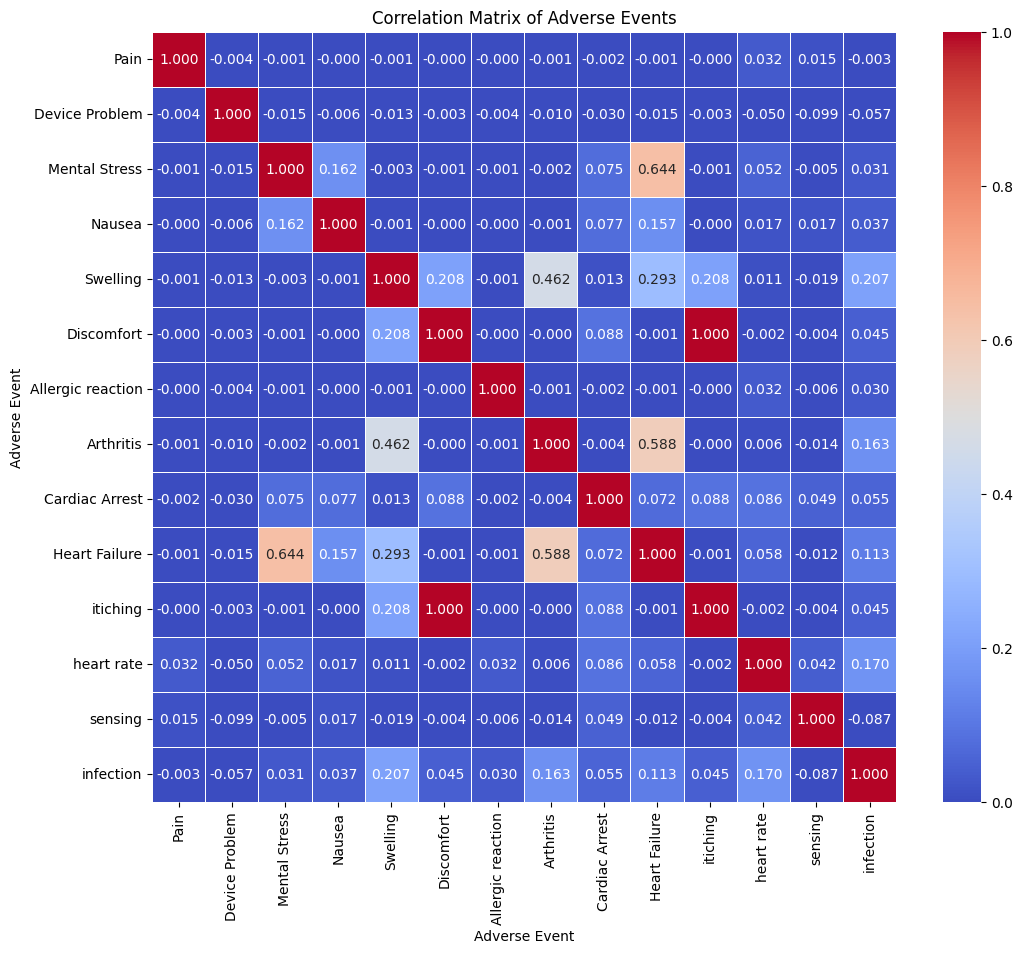

In [37]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/finaldata.csv')

# Load the adverse events keywords file
keywords_data = pd.read_csv('/content/adverse_events_keywords.csv')

# Extract the FOI_TEXT column from your dataset and drop missing values
foi_text = data['FOI_TEXT'].dropna().values

# Function to clean and extract words from text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetical characters
    return text

# Apply the function to clean the keywords in the adverse events keywords file
keywords_data['Keywords'] = keywords_data['Keywords'].apply(lambda x: [kw.strip().lower() for kw in x.split(',')])

# Create a new dataframe to track occurrences of these keywords from the provided adverse events list
adverse_event_keywords = pd.DataFrame(0, index=data.index, columns=keywords_data['Adverse Event'])

# Populate the dataframe based on the presence of each keyword in the FOI_TEXT
for i, text in enumerate(foi_text):
    words = clean_text(text).split()
    for index, row in keywords_data.iterrows():
        adverse_event = row['Adverse Event']
        event_keywords = row['Keywords']
        # If any of the event keywords are found in the text, mark the occurrence
        if any(kw in words for kw in event_keywords):
            adverse_event_keywords.at[i, adverse_event] = 1

# Count the occurrences of each adverse event
event_occurrences = adverse_event_keywords.sum(axis=0).sort_values(ascending=False)

# Select the top 10 most frequent adverse events
top_10_events = event_occurrences.index[:10]


# Filter the correlation matrix to include only the top 10 events
adverse_event_keywords_top_10 = adverse_event_keywords[top_10_events]
correlation_matrix_top_10 = adverse_event_keywords_top_10.corr()


# Define custom ticks for the color bar like in your friend's example
colorbar_ticks = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0]

# Plot the filtered correlation matrix using a color map similar to your friend's
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt=".3f", linewidths=0.5, cbar_kws={'ticks': colorbar_ticks})

# Set the custom tick labels for the color bar
heatmap.collections[0].colorbar.set_ticks(colorbar_ticks)

plt.title("Correlation Matrix of Adverse Events")
plt.show()



